# Data pre-processing & Data Cleaning

In [44]:
import pandas as pd

In [45]:
url = 'flowSunJun115.csv'
df = pd.read_csv(url)

In [46]:
print(df['Tag']) #Normal & Attack are the Tag/Labels
df.shape

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
           ...   
275523     Normal
275524     Normal
275525     Normal
275526     Normal
275527     Normal
Name: Tag, Length: 275528, dtype: object


(275528, 20)

In [47]:
df.columns

Index(['appName', 'source', 'protocolName', 'sourcePort', 'destination',
       'destinationPort', 'direction', 'totalSourceBytes',
       'totalDestinationBytes', 'totalDestinationPackets',
       'totalSourcePackets', 'sourcePayloadAsBase64', 'sourcePayloadAsUTF',
       'destinationPayloadAsBase64', 'destinationPayloadAsUTF',
       'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription',
       'startDateTime', 'stopDateTime', 'Tag'],
      dtype='object')

In [48]:
tag = df['Tag']
tag.value_counts() # White Spaces in Tag Label & NaN


 Normal    247139
 Attack     19787
             8546
 0             56
Name: Tag, dtype: int64

## Removing Empty Spaces in 'Tag' Label

In [174]:
import threading

class Preprocessor:
    
    def __init__(self, csv_path='flowSunJun115.csv'):
        self.df = pd.read_csv(csv_path)
    
    def get_df(self):
        return self.df
    
    def remove_outlier(self, outliers):
        print("Removing indexes : ",outliers )
        self.df.drop(outliers, inplace=True)
        print("Removed outliers !")
        print(self.df.shape)

    def rem_space(self, var1,var2):
        var1 = str(var1)
        var2 = str(var2)
        df = self.get_df()
        outlier_indexes = df.loc[df['Tag'].isin([var1,var2])].index #Extract Rows w var1,var2 in em
        print(type(outlier_indexes[0]))
        print((outlier_indexes[0]))
        return outlier_indexes
    
    def shape(self):
        return self.df.shape
    
    def outlier_remover(self):
        outlier_list = self.rem_space(' ', '0')
        print("Outliers Count : ",len(outlier_list))
        print("Step : ", step)
        self.remove_outlier(outlier_list)
        print("[*] Done !\nNew shape : ",self.df.shape)
        
        
    def attackNormalVisualize(self):
        %matplotlib inline
        tag = self.df['Tag']
        tag.value_counts().plot(kind='bar')# White Spaces in Tag Label & NaN; as shown in barplot
        print(tag.value_counts()[0])
        plt.show()
    
    def tagZeroRemoval(self):
        zeroOutliers = self.df.loc[self.df['Tag'].isin(['0'])].index
        print(zeroOutliers)
        self.df = self.df.drop(zeroOutliers)
        
    def attackProbability(self):
        df_tag = self.df['Tag']
        df_tag.value_counts()
        Attack_count = df_tag.value_counts()[1]
        Benign_count = df_tag.value_counts()[0]
        TotalOutcomes = (Attack_count + Benign_count)
        Attack_proba = ((Attack_count / (TotalOutcomes)) )

        print(Attack_count ,'/', Attack_count + Benign_count, ', Attack_count:',Attack_count,'Benign_count:',Benign_count)
        print(Attack_proba, 'Probability of Attack')
#         return Attack_proba

    def fill_NA(self):
        self.df = self.df.fillna(0)
        self.df['sourceTCPFlagsDescription'] = df['sourceTCPFlagsDescription'].replace('N/A', 0)
        self.df['destinationTCPFlagsDescription'] = df['destinationTCPFlagsDescription'].replace('N/A', 0)
#         print('?')
        return self.df

    def getTagValues(self):
        TagValues = self.df['Tag']
        return TagValues.value_counts()
    
    def scatter_plot(self):
        plt.figure(figsize=(10, 5)) 

        x =  range(self.df['Tag'].size)
        y =  self.df['Tag']
        plt.scatter(x, y, marker='x', s=1)
        plt.title("Relationship between Malicious & Benign Activity")
        plt.xlabel("Packet Arrival Order")
        plt.ylabel("Labels")

        plt.show()
        
        
    def dropCertainColumns(self):
        self.df = self.df.drop(columns=['totalSourcePackets','totalDestinationPackets','startDateTime','stopDateTime'])
        return self.df

 

        

In [115]:
df.loc[df['Tag'].isin([' ','0'])].index

Int64Index([ 73750,  73781,  73814,  73849,  73881,  73915,  73949,  73983,
             74018,  74052,
            ...
            275265, 275292, 275320, 275350, 275380, 275410, 275434, 275460,
            275487, 275515],
           dtype='int64', length=6239)

In [175]:
pp = Preprocessor()
pp.shape()
pp.outlier_remover()
pp.shape()
# pp.attackNormalVisualize()

<class 'numpy.int64'>
31
Outliers Count :  8546
Step :  1559
Removing indexes :  Int64Index([    31,     64,     95,    124,    154,    183,    213,    243,
               270,    295,
            ...
            275265, 275292, 275320, 275350, 275380, 275410, 275434, 275460,
            275487, 275515],
           dtype='int64', length=8546)
Removed outliers !
(266982, 20)
[*] Done !
New shape :  (266982, 20)


(266982, 20)

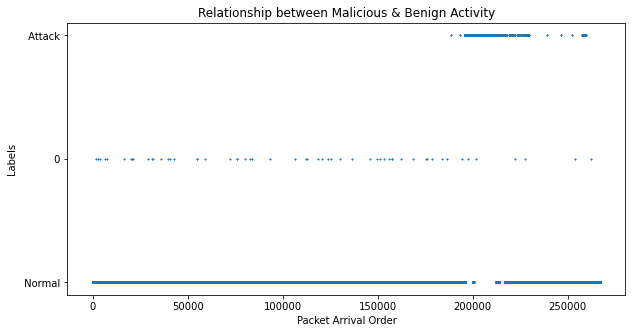

In [177]:
# pp.outlier_remover()
# tag = df['Tag']
# pp.tagZeroRemoval()
# pp.attackProbability()
# pp.fill_NA()
# pp.getTagValues()
pp.scatter_plot()
# pp.dropCertainColumns()
# pp.attackNormalVisualize()


In [130]:
rem_space(df,' ', '0')

<class 'numpy.int64'>
73750


Int64Index([ 73750,  73781,  73814,  73849,  73881,  73915,  73949,  73983,
             74018,  74052,
            ...
            275265, 275292, 275320, 275350, 275380, 275410, 275434, 275460,
            275487, 275515],
           dtype='int64', length=6239)

In [85]:
df.shape

(275528, 20)

### Attack Probability

19787 / 266926 , Attack_count: 19787 Benign_count: 247139
0.0741291593924908 Probability of Attack


0.0741291593924908

## Removal of Outliers

 Normal    247139
 Attack     19787
             6239
 0             37
Name: Tag, dtype: int64

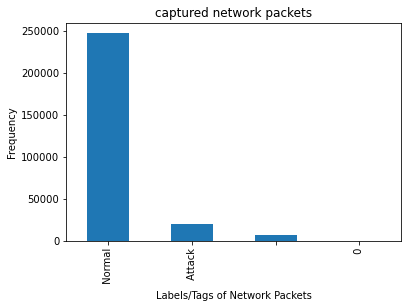

In [169]:
tag = df['Tag']
tag.value_counts().plot(kind='bar')# White Spaces in Tag Label & NaN; as shown in barplot
plt.ylabel('Frequency')
plt.xlabel('Labels/Tags of Network Packets');
plt.title("captured network packets")
plt.show()

In [25]:
kyun = df['Tag']
kyun.value_counts()

 Normal    247139
 Attack     19787
Name: Tag, dtype: int64

In [26]:
values = {'sourceTCPFlagsDescription': 0, 'destinationTCPFlagsDescription': 0}
df = df.fillna(value=values)
df.head(20)




,appName,source,protocolName,sourcePort,destination,destinationPort,direction,totalSourceBytes,totalDestinationBytes,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,destinationPayloadAsUTF,sourceTCPFlagsDescription,destinationTCPFlagsDescription,Tag
0,Unknown_UDP,192.168.5.122,udp_ip,5353,224.0.0.251,5353,L2R,2633658,0,0,0,0,0,N/A,N/A,Normal
1,Unknown_UDP,192.168.5.122,udp_ip,5353,224.0.0.251,5353,L2R,2633658,0,0,0,0,0,N/A,N/A,Normal
2,HTTPWeb,192.168.2.113,tcp_ip,4191,192.168.5.122,80,L2L,64,128,0,0,0,0,F A,R,Normal
3,HTTPWeb,192.168.2.113,tcp_ip,4191,192.168.5.122,80,L2L,64,128,0,0,0,0,F A,R,Normal
4,HTTPWeb,192.168.2.113,tcp_ip,4192,207.241.148.80,80,L2R,128,64,0,0,0,0,F A,F A,Normal
5,HTTPWeb,192.168.2.113,tcp_ip,4192,207.241.148.80,80,L2R,128,64,0,0,0,0,F A,F A,Normal
6,HTTPImageTransfer,192.168.2.110,tcp_ip,1864,216.49.88.12,80,L2R,128,128,0,0,0,0,F A,F A,Normal
7,HTTPImageTransfer,192.168.2.110,tcp_ip,1864,216.49.88.12,80,L2R,128,128,0,0,0,0,F A,F A,Normal
8,SecureWeb,192.168.2.113,tcp_ip,4186,63.245.209.72,443,L2R,64,0,0,0,0,0,F A,0,Normal
9,SecureWeb,192.168.2.113,tcp_ip,4186,63.245.209.72,443,L2R,64,0,0,0,0,0,F A,0,Normal


In [18]:
# 'appName' : '',
#           'source': '', 
#           'protocolName': '', 
#           'sourcePort': '', 
#           'destination': '',
#           'destinationPort': '',
#           'direction': '',
#           'totalSourceBytes': '',
#           'totalDestinationBytes': '',
#           'totalDestinationPackets': '',
#           'totalSourcePackets': '',
#           'sourcePayloadAsBase64': '',
#           'sourcePayloadAsUTF': '',
#           'destinationPayloadAsBase64': '',
#           'destinationPayloadAsUTF': '',
#           'sourceTCPFlagsDescription': '',
#           'destinationTCPFlagsDescription': '',          
#           'startDateTime': '', 
#           'stopDateTime': '', 
#           'Tag': ''

# totalSourcePackets
# totalDestinationPackets
# startDateTime
# stopDateTime

In [21]:
df = df.drop(columns=['totalSourcePackets','totalDestinationPackets','startDateTime','stopDateTime'])
# df.head(20)


In [27]:
kyun.value_counts()

 Normal    247139
 Attack     19787
Name: Tag, dtype: int64

#  Scatter Plot

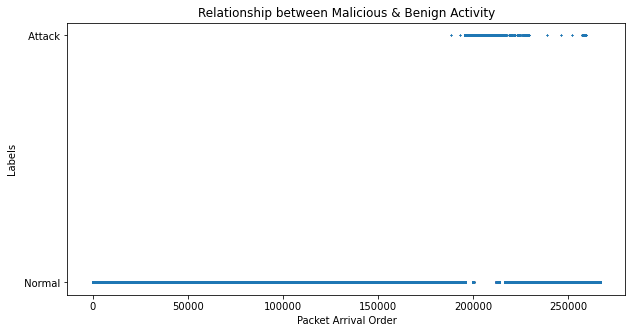

In [29]:
# plt.figure(figsize=(10, 5)) 

# x =  range(df['Tag'].size)
# y =  df['Tag']

# plt.scatter(x, y, marker='x', s=1)
# plt.title("Relationship between Malicious & Benign Activity")
# plt.xlabel("Packet Arrival Order")
# plt.ylabel("Labels")

# plt.show()

### Histogram

In [86]:
# wt = df['Tag']
# wt.hist(bins=5)
# plt.xlabel("Labels in this current dataset")
# plt.ylabel("Frequency of Packets captured")
# plt.show()

## Bar Plot


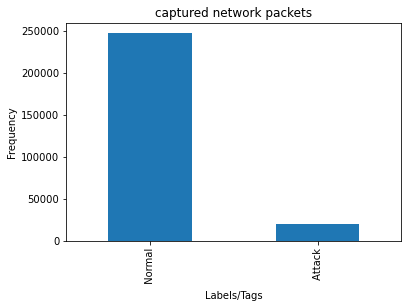

In [30]:
tag = df['Tag']
tag.value_counts().plot(kind='bar')# White Spaces in Tag Label & NaN; as shown in barplot
plt.ylabel('Frequency')
plt.xlabel('Labels/Tags');
plt.title("captured network packets")
plt.show()


## TFIDF

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
df1 = df.drop(columns=['Tag'])
# df1 = df1.drop
# df1.head()
tfidf = TfidfVectorizer()
matrix_input = tfidf.fit_transform(df1)
matrix_input

<15x15 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

## KMeans Clustering 

In [106]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
# print(km)
km.fit(matrix_input)
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [117]:
#3 Using the elbow method to find out the optimal number of #clusters. 
#KMeans class from the sklearn library.from sklearn.cluster import KMeans
wcss=[]#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.for i in range(1,11): 
# kmeans = KMeans(n_clusters=i, init ='k-means++>', max_iter=300,  n_init=10,random_state=0 )#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.kmeans.fit(X)#kmeans algorithm fits to the X datasetwcss.append(kmeans.inertia_)#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.#4.Plot the elbow graphplt.plot(range(1,11),wcss)


# for i in range(1,11): 
#     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
#     kmeans.fit(matrix_input)
#     wcss.append(kmeans.inertia_)
    
    
    
# plt.plot(range(1,11),wcss)
# plt.title('The Elbow Method Graph')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# print(wcss)

In [113]:
# kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# y_kmeans = kmeans.fit_predict(matrix_input)
# plt.scatter(matrix_input[y_kmeans==0, 0], matrix_input[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(matrix_input[y_kmeans==1, 0], matrix_input[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(matrix_input[y_kmeans==2, 0], matrix_input[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(matrix_input[y_kmeans==3, 0], matrix_input[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(matrix_input[y_kmeans==4, 0], matrix_input[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')


# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
# plt.title('Clusters of Customers')
# plt.xlabel('Annual Income(k$)')
# plt.ylabel('Spending Score(1-100')
# plt.show()